In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2021, 12, 28)

# Load the CSV file and set 'Date' as the index
data = pd.read_csv('Tatacoffee13_21.csv', parse_dates=['Date'], index_col='Date')

# Filter the data based on the index
stk_data = data[(data.index >= start) & (data.index <= end)]

# Display the filtered data
print(stk_data)

              Open    High     Low   Close
Date                                      
2021-06-01  180.00  181.35  172.65  174.25
2021-06-02  173.55  175.65  172.05  174.00
2021-06-03  176.90  178.70  175.60  176.70
2021-06-04  177.90  177.90  173.75  174.35
2021-06-07  176.40  176.65  173.00  174.35
...            ...     ...     ...     ...
2021-12-22  202.90  207.80  201.35  205.00
2021-12-23  206.00  206.85  202.05  202.95
2021-12-24  203.90  203.90  199.35  201.00
2021-12-27  200.00  222.00  196.00  218.35
2021-12-28  219.65  220.45  211.55  212.35

[145 rows x 4 columns]


In [3]:
df=stk_data[['Close']]

In [4]:
df

,Close
Date,
2021-06-01,174.25
2021-06-02,174.00
2021-06-03,176.70
2021-06-04,174.35
2021-06-07,174.35
...,...
2021-12-22,205.00
2021-12-23,202.95
2021-12-24,201.00


# Step :1 read date column as date time datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2021-06-01 to 2021-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   145 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [6]:
df.head()

,Close
Date,
2021-06-01,174.25
2021-06-02,174.00
2021-06-03,176.70
2021-06-04,174.35
2021-06-07,174.35


# Step :2 No missing value

In [ ]:
df.isnull().sum()

# Step :3 Data Structure required for Time series

In [ ]:
#df=df.groupby('Date').sum()

In [7]:
#daily> monthyly 
# how to aggregate the date we take the sum or the mean?
#df1=df1.resample(rule='D').sum() # rule & aggregation parameter
# A year end,MS month start , M month end, D for Daily
df=df.resample(rule='D').sum()

In [8]:
df.head(10)

,Close
Date,
2021-06-01,174.25
2021-06-02,174.00
2021-06-03,176.70
2021-06-04,174.35
2021-06-05,0.00
2021-06-06,0.00
2021-06-07,174.35
2021-06-08,177.45
2021-06-09,178.75


<Axes: xlabel='Date'>

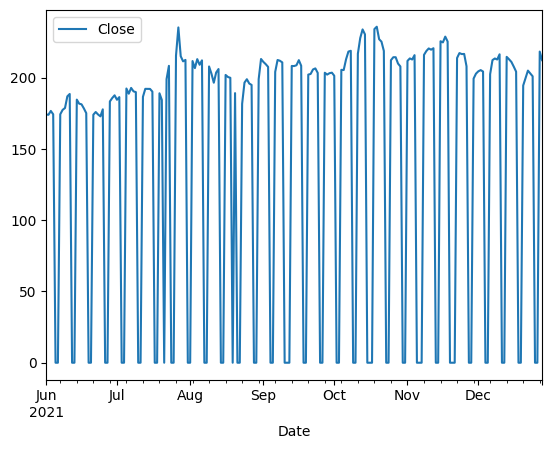

In [9]:
df.plot()

In [10]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

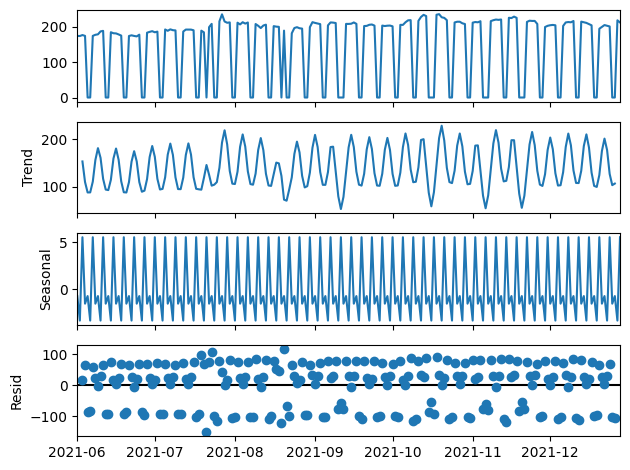

In [11]:
#seasonal_decompose(df, model='multiplicative', period=3).plot();
seasonal_decompose(df, model='additive', period=4).plot();

# Step :4 Train test Split

In [12]:
# Calculate the size of the training data (80% of the DataFrame)
df = df.head(145)
training_size = int(len(df) * 0.80)

# Print the training size
print("Training size:", training_size)

# Split the data into training and testing sets
train = df[:training_size]  # First 80% of the data
test = df[training_size:]   # Remaining 20% of the data

# Print the shapes of the train and test sets
print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)

Training size: 116
Training data shape: (116, 1)
Testing data shape: (29, 1)


In [13]:
train.shape

(116, 1)

In [14]:
train.tail()

,Close
Date,
2021-09-20,202.20
2021-09-21,202.65
2021-09-22,205.80
2021-09-23,206.55
2021-09-24,203.40


In [15]:
test.shape

(29, 1)

# Step :5 Holt Winter Model

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#hwmodel = ExponentialSmoothing(train.sales, trend='add', seasonal='mul', seasonal_periods=4).fit()
# Fit the model (assuming you're using 'Close' column)
hwmodel = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=7).fit()

In [17]:
test_pred=hwmodel.forecast(29)
#28 days

In [18]:
test_pred

2021-09-25      8.008468
2021-09-26      7.926322
2021-09-27    198.216446
2021-09-28    200.471555
2021-09-29    191.808647
2021-09-30    191.812862
2021-10-01    191.118217
2021-10-02      9.016192
2021-10-03      8.934046
2021-10-04    199.224170
2021-10-05    201.479279
2021-10-06    192.816371
2021-10-07    192.820587
2021-10-08    192.125942
2021-10-09     10.023916
2021-10-10      9.941771
2021-10-11    200.231894
2021-10-12    202.487004
2021-10-13    193.824096
2021-10-14    193.828311
2021-10-15    193.133666
2021-10-16     11.031641
2021-10-17     10.949495
2021-10-18    201.239619
2021-10-19    203.494728
2021-10-20    194.831820
2021-10-21    194.836036
2021-10-22    194.141390
2021-10-23     12.039365
Freq: D, dtype: float64

<Axes: xlabel='Date'>

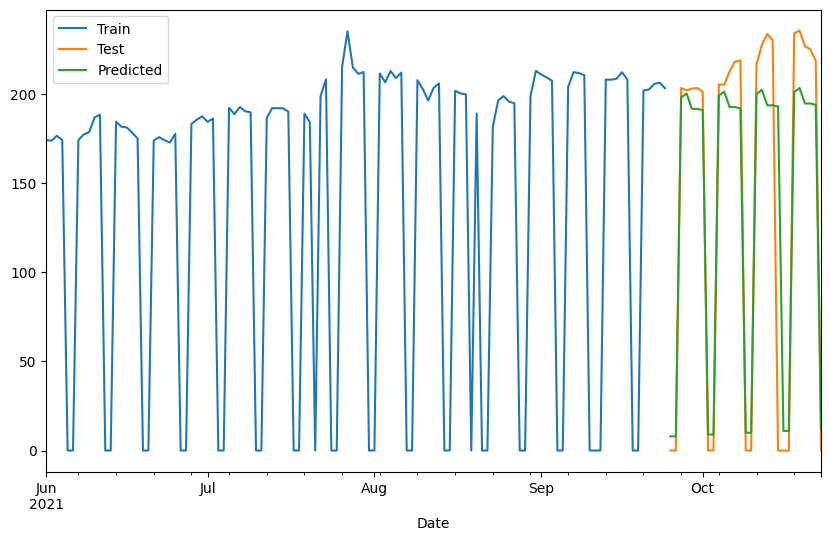

In [19]:
train['Close'].plot(legend=True,label='Train', figsize=(10,6))
test['Close'].plot(legend=True,label='Test', figsize=(10,6))
test_pred.plot(legend=True,label='Predicted')

<Axes: xlabel='Date'>

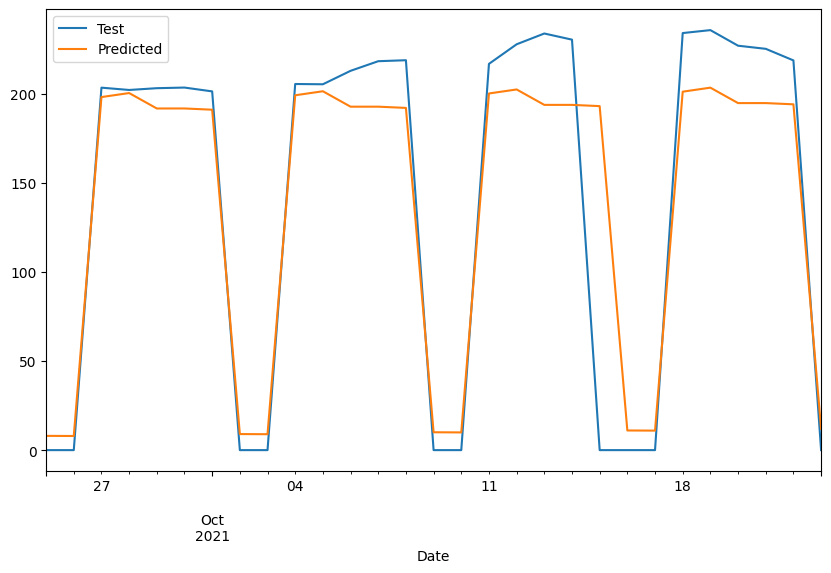

In [20]:
test['Close'].plot(legend=True,label='Test', figsize=(10,6))
test_pred.plot(legend=True,label='Predicted')

# Step :6 Model Evalution

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(test,test_pred)
#This means, on average, the squared difference between actual and predicted values is 55,071.(test=actual vs predict)

1688.8115494292922

In [23]:
np.sqrt(mean_squared_error(test,test_pred))
#The model’s typical error RMSE

41.09515238357552

In [24]:
df.Close.mean(),np.sqrt(df.Close.var())

(137.85379310344828, 93.72219181701138)

In [25]:
rmse_percentage = (np.sqrt(mean_squared_error(test, test_pred)) / df.Close.mean()) * 100
print(f"RMSE as a percentage of mean: {rmse_percentage:.2f}%")

RMSE as a percentage of mean: 29.81%


In [ ]:
#close mean 137.85 sales fluctuate 93.72 rmse error 41 less

# Step :7 Final Model

In [31]:
final_model=ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=None).fit()

In [32]:
pred=final_model.forecast(steps=28)

In [33]:
pred

2021-10-24      9.175349
2021-10-25    209.226944
2021-10-26    211.794953
2021-10-27    202.363167
2021-10-28    201.979449
2021-10-29    188.164590
2021-10-30      9.558918
2021-10-31     10.107318
2021-11-01    210.158912
2021-11-02    212.726921
2021-11-03    203.295136
2021-11-04    202.911418
2021-11-05    189.096559
2021-11-06     10.490887
2021-11-07     11.039286
2021-11-08    211.090881
2021-11-09    213.658890
2021-11-10    204.227105
2021-11-11    203.843387
2021-11-12    190.028528
2021-11-13     11.422855
2021-11-14     11.971255
2021-11-15    212.022850
2021-11-16    214.590859
2021-11-17    205.159073
2021-11-18    204.775355
2021-11-19    190.960496
2021-11-20     12.354824
Freq: D, dtype: float64

<Axes: xlabel='Date'>

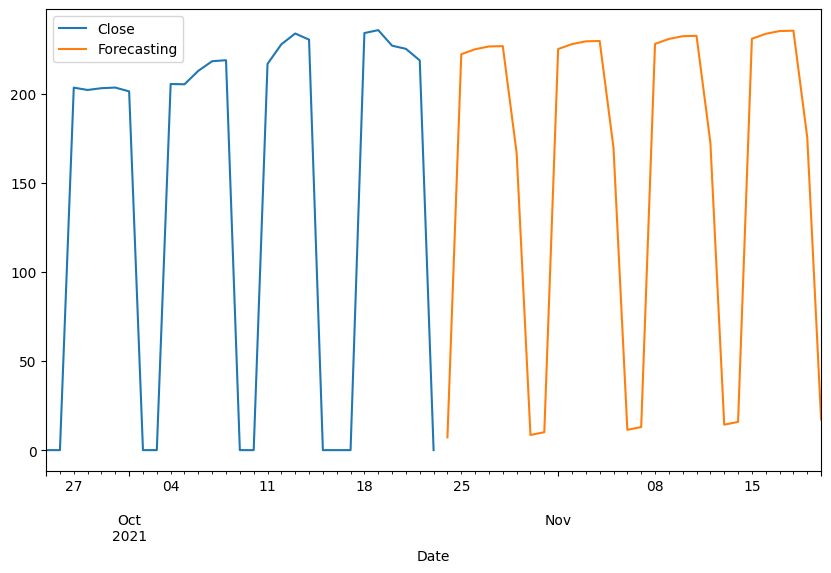

In [29]:
test['Close'].plot(legend=True,label='Close', figsize=(10,6))
pred.plot(legend=True,label='Forecasting')